# DF Cleaner

## Data cleaning

In [168]:
import pandas as pd

df = pd.read_csv("../Materials/Metadata_OBV_gesplitst_test.csv")
df.head()

,Image,Collection,Production,Date,Occasion
0,K.V.O. programmas 1893-97_00001-20211201_11330...,1893-1897,NaN,NaN,NaN
1,K.V.O. programmas 1893-97_00002-20211201_11332...,1893-1897,NaN,NaN,NaN
2,K.V.O. programmas 1893-97_00003-20211201_11333...,1893-1897,NaN,NaN,NaN
3,K.V.O. programmas 1893-97_00004-20211201_11334...,1893-1897,NaN,NaN,NaN
4,K.V.O. programmas 1893-97_00005-20211201_11335...,1893-1897,De Vrijschutter,3/10/1893,Eerste vertoning


In [169]:
#Delete trailing and leading whitespaces.
df['Image'] = df['Image'].str.strip() 
df['Collection'] = df['Collection'].str.strip() 
df['Production'] = df['Production'].str.strip() 
df['Occasion'] = df['Occasion'].str.strip() 


In [170]:
#New boolean column, which indicates whether the performance was part of a multiple bill (True) or not (False).

multiple_bills = []
for row in df['Production']:
    if '+' in str(row):
        multiple_bills.append(True)
    else:
        multiple_bills.append(False)


df['Multiple bill'] = multiple_bills
df['Multiple bill'].value_counts()

False    10466
True       526
Name: Multiple bill, dtype: int64

In [171]:
#New column with a random ID voor each performance.

import random
df['Performances_ID'] = random.sample(range(100000, 999999), df.shape[0])


In [172]:
# Cells that include a '+' , i.e. a multiple bill are split so that each row only contains one wok.
# Through the Performance_ID we can keep track of those performances that were performed as a multiple bill.

df = df.assign(Production=df.Production.str.split("+")).explode('Production')
df = df.reset_index(drop=True)
df.head()

,Image,Collection,Production,Date,Occasion,Multiple bill,Performances_ID
0,K.V.O. programmas 1893-97_00001-20211201_11330...,1893-1897,NaN,NaN,NaN,False,897806
1,K.V.O. programmas 1893-97_00002-20211201_11332...,1893-1897,NaN,NaN,NaN,False,513044
2,K.V.O. programmas 1893-97_00003-20211201_11333...,1893-1897,NaN,NaN,NaN,False,612800
3,K.V.O. programmas 1893-97_00004-20211201_11334...,1893-1897,NaN,NaN,NaN,False,394711
4,K.V.O. programmas 1893-97_00005-20211201_11335...,1893-1897,De Vrijschutter,3/10/1893,Eerste vertoning,False,770062


## Normalise spelling

In [173]:
#Establish dictionary in I keep track of spelling variations.
VariatieC = {
"Het Minnebrugje" : "T' Minnebrugje Het Minnebrugsken Het minnebrugje Minnebrugje",
"Het Arendsnest" : "Arendsnest",
"Bohème" : "Boheme",
"De Bruid der Zee" : "Bruid der Zee",
"Het Kind" : "Das Kind",
"Czaar en Timmerman" : "Csaar en Timmerman",
"De Verzonken Klok" : "De Verzonkene Klok",
"De Bedelstudent" : "De Arme student",
"De Doode Oogen" : "De Dode Ogen",
"De Doode Stad" : "De Dode Stad",
"De Koningin van Saba" : "De Koningin van Saaba",
"De Lustige Boer" : "De Lustige Broeder Lustige Boer",
"De Lustige Oorlog" : "De Vrolijke Oorlog",
"De Lustige Vrouwtjes van Windsor" : "The Merry Wives of Windsor De Vrolijke Vrouwtjes van Windsor Lustige Vrouwtjes van Windsor",
"De Meesterzangers van Nurenberg" : "De Meesterzanger De Meesterzangers De Meesterzangers van Nuremberg De Meesterzangers van Nürnberg", 
"De Tooverfluit" : "Tooverfluit Tooverfluit",
"De Tragedie van Salomé" : "De tragedie van Salomé",
"De Twee Medaillons" : "De Tweede Medaillons",
"De Vestale" : "Vestale",
"De Vrijschutter" : "Vrijschutter",
"De Walkure" : "De Walküre La Walkyrie Die Walkure",
"De Zeven Hoofdzonden" : "de Zeven Hoofdzonden",
"De Drie Houten Poppen" : "De drie Houten Poppen",
"De Evangelieman" : "Die Evangelieman",
"Don Juan" : "Don Giovanni",
"De Draaimolen" : "Draaimolen",
"Driemeisjeshuis" : "Het Driemeisjeshuis",
"Een Nacht te Grenada" : "Eeen Nacht te Grenada",
"Ein Walzertraum" : "Walzertaum",
"Hansje en Grietje" : "Hans en Grietje",
"Herbergprinses" : "Herbergrprinses Herberprinses",
"Het Rijngoud" : "Rijngoud",
"Het Rozemarijntje" : "Rosemarijntje Rozemarijntje",
"Winternachtsdroom" : "Het Winternachtsdroom",
"Zeevolk" : "Het Zeevolk",
"Hoffmann's Vertellingenen" : "Hoffmann's Vertellingen",
"Jean-Marie" : "Jose Maria Jean Marie Marie José",
"Jozef in Egypte" : "Josef in Egypte",
"De Kinderen der Zee": "Kinderen der Zee",
"Liefdetoover" : "Liefde Toover",
"Marieke van Nijmegem" : "Marieke van Nijmegen Marike van Nymegem",
"Orpheus' Dood" : "Orpheus's Dood",
"Paljas" : "Pagliacci",
"Parisina" : 'Parsina',
"Quinten Massijs" : "Quinten Massys Quinten Metsys Quinten-Massijs Quinten-Massys",
"Reeks van Oud-Grieksche Dansen" : "Reeks van Oud-Griekscge Dansen",
"Reinaert de Vos" : "Reinart de Vos",
"De Rijndwergen": "Rijndwergen",
"Tannhauser" : "Tannhäuser",
"Theroigne de Mericout" : "Theroigne De Mericourt Theroigne de Mericoux Théroigne de Méricourt Théroigne de Méricout",
"Toespraak van den Heer Dr. Maurits Sabbe, conservator van het Museum Plantijn" : "Toespraal van den Heer Dr. Maurits Sabbe, conservator van het Museum Plantijn",
"Tweede Dansenreeks" : "Tweede dansreeks",
"Zwaargewicht" : "Zwaargewicht ( of De eer van't Land)"
}

In [174]:
#create functions that iterates over the items in the dictionary and returns the key if the title is in the values.
#if it is not in the values, there was not spelling variation for this title and the title is returned.
def clean_titles (row):

    for key, values in VariatieC.items():
        if str(row) in str(values):
            #print('it is in the values')
            return key
        elif row == key:
            return key
    else:
        return row
    

In [175]:
#Test it on some variations.

a = 'Quinten Metsys'
b = "Tannhäuser"
c = 'Madame Butterfly'

print(clean_titles(a))
print(clean_titles(b))
print(clean_titles(c))


Quinten Massijs
Tannhauser
Madame Butterfly


In [176]:
#Function is now applied to the entire dataset. The normalised spelling is gathered in a new column called 'Genormaliseerde titel'.
df['Normalised title'] = df['Production'].apply(clean_titles)


In [177]:
for column in df.columns:
    try:
        df[column] = df[column].str.strip()
    except AttributeError:
        continue

## Add metadata

Load dictionary-formatted txt-file containing additional metadata.
- key = normalised title
- value [0] = original title
- value [1] = composer
- value [2] = year of first performance
- value [3] = original title
- value [4] = genre


In [178]:
with open('C:/Users/monaa/Dropbox/Thesis/secundair/META.txt','r', encoding = 'UTF8') as inf:
    Metadata = eval(inf.read())


In [179]:
#Check if the txt-file is formatted correctly
output = []
for key, values in Metadata.items():
    if len(values) != 5:
       output.append(values)
       print(output)

if len(output) == 0:
    print('Looking good!')

Looking good!


In [180]:
#Define a function that identifies the original lanagage based on the metadata.

def add_taal (row):
    for key, values in Metadata.items():
        if row == key:
            return values[0]
    else:
        return 'N/A'

#try it out.

a = "Madame Butterfly"
b = "Tannhauser"
c = "Quinten Massijs"

print(add_taal(a))
print(add_taal(b))
print(add_taal(c))


ITA
DUI
NL


In [181]:
#Define a function that identifies the composer based on the metadata.

def add_composer (row):
    for key, values in Metadata.items():
        if row == key:
            return values[1]
    else:
        return 'N/A'
    
#try it out.

print(add_composer(a))
print(add_composer(b))
print(add_composer(c))


Giacomo Puccini
Richard Wagner
Emile Wambach


In [182]:
#Define a function that identifies the year of the first performance based on the metadata.

def add_premiere (row):
    for key, values in Metadata.items():
        if row == key:
            return values[2]
    else:
        return 'N/A'

print(add_premiere(a))
print(add_premiere(b))
print(add_premiere(c))


1904
1845
1899


In [183]:
#Define a function that identifies the year of the original title based on the metadata.

def add_oortitel (row):
    for key, values in Metadata.items():
        if row == key:
            return values[3]
    else:
        return 'N/A'


print(add_oortitel(a))
print(add_oortitel(b))
print(add_oortitel(c))

Madama Butterfly
Tannhäuser
Quinten Massys


In [184]:
#Define a function that identifies the year of the genre based on the metadata.

def add_genre (row):
    for key, values in Metadata.items():
        if row == key:
            return values[4].lower()
    else:
        return 'N/A'


print(add_genre(a))
print(add_genre(b))
print(add_genre(c))

opera seria
romantische oper
lyrisch drama


In [185]:
#add the metadata as new columns in the dataframe.

df['Original language'] = df['Normalised title'].apply(add_taal)
df['Composer'] = df['Normalised title'].apply(add_composer)
df['Original premiere'] = df['Normalised title'].apply(add_premiere)
df['Original title'] = df['Normalised title'].apply(add_oortitel)
df['genre'] = df['Normalised title'].apply(add_genre)
df.sample(5)


,Image,Collection,Production,Date,Occasion,Multiple bill,Performances_ID,Normalised title,Original language,Composer,Original premiere,Original title,genre
2526,1907-1908 Vlaamsche opera_00165-20211216_13575...,1907-1908,Tannhäuser,19/03/1908,NaN,False,372649,Tannhauser,DUI,Richard Wagner,1845,Tannhäuser,romantische oper
4181,1918-1919_00039-20220207_094426.jpg,1918-1919,NaN,NaN,NaN,False,639354,NaN,N/A,N/A,N/A,N/A,N/A
8501,1929-1930_00211-20220208_162630.jpg,1929-1930,Weenerbloed,16/11/1929,NaN,False,887109,Weenerbloed,DUI,Johann Strauss,1899,Wiener Blut,operetta
8843,1929-1930_00545-20220209_131605.jpg,1929-1930,Lohengrin,13/03/1930,NaN,False,505514,Lohengrin,DUI,Richard Wagner,1850,Lohengrin,romantische oper
4728,1922-1923_00012-20220207_141148.jpg,1922-1923,De Evangelieman,30/09/1922,NaN,False,968078,De Evangelieman,DUI,Wilhelm Kienzl,1894,Der Evangelimann,romantische oper


## Additional preprocessing

In [186]:
#Convert the Date column to datetime

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df.head()

,Image,Collection,Production,Date,Occasion,Multiple bill,Performances_ID,Normalised title,Original language,Composer,Original premiere,Original title,genre
0,K.V.O. programmas 1893-97_00001-20211201_11330...,1893-1897,NaN,NaT,NaN,False,897806,NaN,N/A,N/A,N/A,N/A,N/A
1,K.V.O. programmas 1893-97_00002-20211201_11332...,1893-1897,NaN,NaT,NaN,False,513044,NaN,N/A,N/A,N/A,N/A,N/A
2,K.V.O. programmas 1893-97_00003-20211201_11333...,1893-1897,NaN,NaT,NaN,False,612800,NaN,N/A,N/A,N/A,N/A,N/A
3,K.V.O. programmas 1893-97_00004-20211201_11334...,1893-1897,NaN,NaT,NaN,False,394711,NaN,N/A,N/A,N/A,N/A,N/A
4,K.V.O. programmas 1893-97_00005-20211201_11335...,1893-1897,De Vrijschutter,1893-10-03,Eerste vertoning,False,770062,De Vrijschutter,DUI,Carl Maria von Weber,1821,Der Freischütz,romantische oper


In [187]:

# Obtain the season. An operatic season runs (approximately) from september to May
def get_season(date):
    year = date.year
    if date.month >= 9:
        return f"{year}-{year+1}"
    else:
        return f"{year-1}-{year}"


df['Season'] = df['Date'].apply(get_season)



Before removing the duplicates and blank pages, we create a histogram which visualises the amount of images exists the volume.

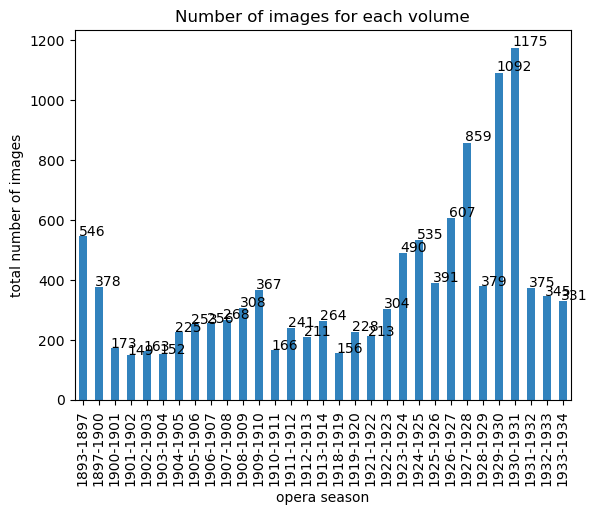

In [192]:
import matplotlib.pyplot as plt

# Count the number of data points for each index
counts = df['Collection'].value_counts().sort_index(axis=0).plot(kind='bar', colormap='tab20c')

# Add labels and title to the plot
plt.xlabel('opera season')
plt.ylabel('total number of images')
plt.title('Number of images for each volume')

# Plot the counts as a bar chart

for p in counts.patches:
    counts.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

# Show the plot
plt.show()

In [ ]:
#Blanco pagina's of irrelevante pagina's worden verwijderd.

old_len = len(df)
df = df.dropna(subset=['Production','Date'])
print(f'{old_len - len(df)} of {old_len} records removed')
df.head()


6267 of 11600 records removed


,Image,Collection,Production,Date,Occasion,Multiple bill,Performances_ID,Normalised title,Original language,Composer,Original premiere,Original title,genre,Season
4,K.V.O. programmas 1893-97_00005-20211201_11335...,1893-1897,De Vrijschutter,1893-10-03,Eerste vertoning,False,801226,De Vrijschutter,DUI,Carl Maria von Weber,1821,Der Freischütz,romantische oper,1893-1894
6,K.V.O. programmas 1893-97_00007-20211201_11341...,1893-1897,De Vrijschutter,1893-10-03,Eerste vertoning,False,272086,De Vrijschutter,DUI,Carl Maria von Weber,1821,Der Freischütz,romantische oper,1893-1894
8,K.V.O. programmas 1893-97_00009-20211201_11343...,1893-1897,Willem Tell,1893-10-05,Eerste vertoning,False,432954,Willem Tell,DUI,Carl Reinecke,1971,Musik zu Schiller’s 'Wilhelm Tell,romantische oper,1893-1894
10,K.V.O. programmas 1893-97_00011-20211201_11345...,1893-1897,De Vrijschutter,1893-10-10,NaN,False,179678,De Vrijschutter,DUI,Carl Maria von Weber,1821,Der Freischütz,romantische oper,1893-1894
12,K.V.O. programmas 1893-97_00013-20211201_11351...,1893-1897,Willem Tell,1893-10-12,NaN,False,286320,Willem Tell,DUI,Carl Reinecke,1971,Musik zu Schiller’s 'Wilhelm Tell,romantische oper,1893-1894


In [ ]:
#Remove duplicate, i.e. cases in which the production and date are the same.

all_dups = len(df)
df = df.drop_duplicates(subset=['Production', 'Date'])
print(f'{all_dups - len(df)} of {all_dups} records removed! {len(df)} records remain')
df.head()


892 of 5333 records removed! 4441 records remain


,Image,Collection,Production,Date,Occasion,Multiple bill,Performances_ID,Normalised title,Original language,Composer,Original premiere,Original title,genre,Season
4,K.V.O. programmas 1893-97_00005-20211201_11335...,1893-1897,De Vrijschutter,1893-10-03,Eerste vertoning,False,801226,De Vrijschutter,DUI,Carl Maria von Weber,1821,Der Freischütz,romantische oper,1893-1894
8,K.V.O. programmas 1893-97_00009-20211201_11343...,1893-1897,Willem Tell,1893-10-05,Eerste vertoning,False,432954,Willem Tell,DUI,Carl Reinecke,1971,Musik zu Schiller’s 'Wilhelm Tell,romantische oper,1893-1894
10,K.V.O. programmas 1893-97_00011-20211201_11345...,1893-1897,De Vrijschutter,1893-10-10,NaN,False,179678,De Vrijschutter,DUI,Carl Maria von Weber,1821,Der Freischütz,romantische oper,1893-1894
12,K.V.O. programmas 1893-97_00013-20211201_11351...,1893-1897,Willem Tell,1893-10-12,NaN,False,286320,Willem Tell,DUI,Carl Reinecke,1971,Musik zu Schiller’s 'Wilhelm Tell,romantische oper,1893-1894
14,K.V.O. programmas 1893-97_00015-20211201_11352...,1893-1897,Charlotte Corday,1893-11-16,NaN,False,805571,Charlotte Corday,NL,Peter Benoit,?,Charlotte Corday,lyrisch drama,1893-1894


In [ ]:
#df wordt opgeslagen.
#df.to_csv('../Materials/KVO_META.csv', encoding = 'utf-8')